# Part A

## Initialization

In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time

In [2]:
#Defining Functions

# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [3]:
#Set Variables
NUM_CLASSES = 3

epochs = 1000
batch_size = 32
num_neurons = 10
seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

histories = {}
timeTaken = {}

In [4]:
#Additional Variables
learningRate = 0.01 #As defined in the assignment
decay = 0.000001 #As defined in the assignment

#Set learning rate
opt = tf.keras.optimizers.SGD(learning_rate=learningRate)

In [5]:

#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
trainX, train_Y = train_input[1:, :21], train_input[1:,-1].astype(int)
trainX = scale(trainX, np.min(trainX, axis=0), np.max(trainX, axis=0))
trainY = train_Y-1
trainX,testX,trainY,testY=train_test_split(trainX, trainY,
train_size=0.7,
test_size=0.3)

#Check shape of test and train set
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1488, 21)
(1488,)
(638, 21)
(638,)


## Q1

In [6]:
# create the model
ffn_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
#Fit the FFN model
histories['ffn'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 806/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 807/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 808/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7

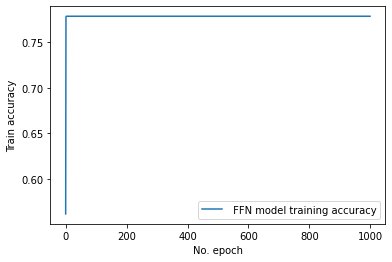

In [8]:
# Plot the Learning Curve
plt.plot(histories['ffn'].history['accuracy'], label=' FFN model training accuracy')
plt.ylabel('Train accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Q2

In [9]:
#For 1000 epochs

#Fit the FFN model for batch size 4
histories['ffn_4'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=4, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 815/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 816/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 817/1000
372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 818/1000
372/372 - 0s - los

In [10]:
#For 1000 epochs

#Fit the FFN model for batch size 8
histories['ffn_8'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=8, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 815/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 816/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 817/1000
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 818/1000
186/186 - 0s - los

In [11]:
#For 1000 epochs

#Fit the FFN model for batch size 16
histories['ffn_16'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=16, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 806/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 807/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 808/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7

In [12]:
#For 1000 epochs

#Fit the FFN model for batch size 32
histories['ffn_32'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 806/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 807/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 808/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7

In [13]:
#For 1000 epochs

#Fit the FFN model for batch size 64
histories['ffn_64'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=64, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 806/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 807/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 808/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7

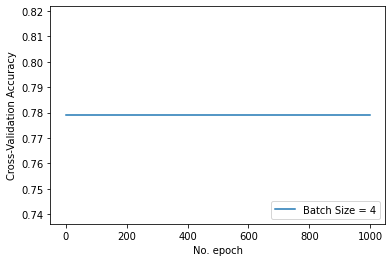

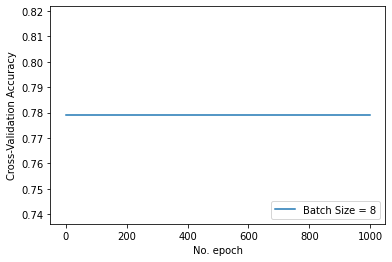

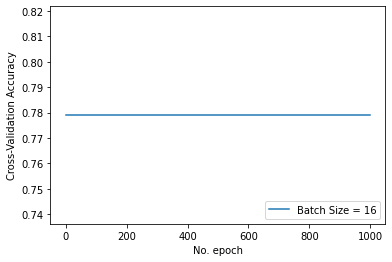

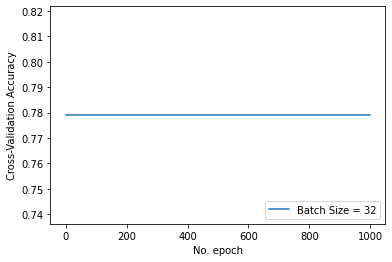

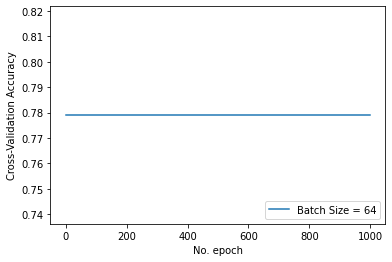

In [14]:
# Plot all Learning Curves
#Plot Batch size 4
plt.plot(histories['ffn_4'].history['val_accuracy'], label='Batch Size = 4')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 8
plt.plot(histories['ffn_8'].history['val_accuracy'], label='Batch Size = 8')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 16
plt.plot(histories['ffn_16'].history['val_accuracy'], label='Batch Size = 16')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 32
plt.plot(histories['ffn_32'].history['val_accuracy'], label='Batch Size = 32')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#plot batch size 64
plt.plot(histories['ffn_64'].history['val_accuracy'], label='Batch Size = 64')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()


In [15]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 4
histories['ffn_4_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=4, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[4] = time.process_time() - start

372/372 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790


In [16]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 8
histories['ffn_8_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=8, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[8] = time.process_time() - start

186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790


In [17]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 16
histories['ffn_16_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=16, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[16] = time.process_time() - start

93/93 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790


In [18]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 32
histories['ffn_32_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[32] = time.process_time() - start

47/47 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790


In [19]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 64
histories['ffn_64_1'] = ffn_model.fit(trainX, trainY, 
                    epochs=1, 
                    batch_size=64, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
#Store time taken
timeTaken[64] = time.process_time() - start
print(timeTaken[64])

24/24 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
0.203125


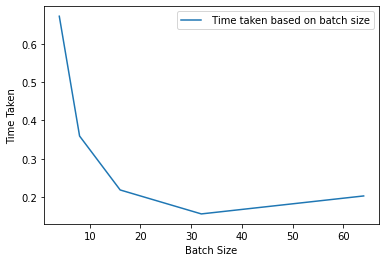

In [20]:
batchsizes=[4,8,16,32,64]

time = [timeTaken[4],timeTaken[8],timeTaken[16],timeTaken[32],timeTaken[64]]

#plot batch size again time taken
plt.plot(batchsizes, time, label=' Time taken based on batch size')
plt.ylabel('Time Taken')
plt.xlabel('Batch Size')
plt.legend(loc="upper right")
plt.show()

In [21]:
#Select 16 as the optimal batch size
batch_size = 16

In [22]:
#Fit the FFN model for train
histories['ffn_train'] = ffn_model.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

- accuracy: 0.7782
Epoch 668/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 669/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 670/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 671/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 672/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 673/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 674/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 675/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 676/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 677/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 678/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 679/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 680/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 681/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 682/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 683/1000
93/93 - 0s - loss: 0.7732 - accuracy: 0.7782
Epoch 684/1000
93/93 

In [23]:
#Fit the FFN model for test
histories['ffn_test'] = ffn_model.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

- accuracy: 0.7790
Epoch 668/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 669/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 670/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 671/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 672/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 673/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 674/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 675/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 676/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 677/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 678/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 679/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 680/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 681/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 682/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 683/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 684/1000
40/40 

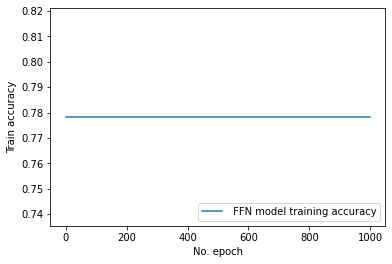

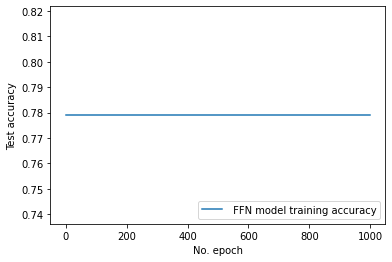

In [24]:
# Plot all Learning Curves for optimal batch size
#Plot Train
plt.plot(histories['ffn_train'].history['accuracy'], label=' FFN model training accuracy')
plt.ylabel('Train accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Test
plt.plot(histories['ffn_test'].history['accuracy'], label=' FFN model training accuracy')
plt.ylabel('Test accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Q3)

In [25]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(5, activation='relu', kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 5 hidden layers neurons
histories['ffn_hl_5'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 806/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 807/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 808/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7

In [26]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(10, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 10 hidden layers neurons
histories['ffn_hl_10'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.8887
Epoch 805/1000
93/93 - 0s - loss: 0.6680 - accuracy: 0.8878 - val_loss: 0.6631 - val_accuracy: 0.8918
Epoch 806/1000
93/93 - 0s - loss: 0.6680 - accuracy: 0.8884 - val_loss: 0.6630 - val_accuracy: 0.8903
Epoch 807/1000
93/93 - 0s - loss: 0.6679 - accuracy: 0.8884 - val_loss: 0.6630 - val_accuracy: 0.8934
Epoch 808/1000
93/93 - 0s - loss: 0.6679 - accuracy: 0.8884 - val_loss: 0.6630 - val_accuracy: 0.8934
Epoch 809/1000
93/93 - 0s - loss: 0.6678 - accuracy: 0.8878 - val_loss: 0.6629 - val_accuracy: 0.8934
Epoch 810/1000
93/93 - 0s - loss: 0.6678 - accuracy: 0.8871 - val_loss: 0.6627 - val_accuracy: 0.8887
Epoch 811/1000
93/93 - 0s - loss: 0.6677 - accuracy: 0.8878 - val_loss: 0.6628 - val_accuracy: 0.8934
Epoch 812/1000
93/93 - 0s - loss: 0.6676 - accuracy: 0.8884 - val_loss: 0.6627 - val_accuracy: 0.8918
Epoch 813/1000
93/93 - 0s - loss: 0.6676 - accuracy: 0.8884 - val_loss: 0.6627 - val_accuracy: 0.8918
Epoch 814/1000
93/93 - 0s - loss: 0.6675 - accuracy: 0.8878 - val_loss: 0.6

In [27]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(15, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 15 hidden layers neurons
histories['ffn_hl_15'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.8213
Epoch 805/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8266 - val_loss: 0.7342 - val_accuracy: 0.8213
Epoch 806/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8259 - val_loss: 0.7341 - val_accuracy: 0.8213
Epoch 807/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8259 - val_loss: 0.7341 - val_accuracy: 0.8213
Epoch 808/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8259 - val_loss: 0.7341 - val_accuracy: 0.8213
Epoch 809/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8266 - val_loss: 0.7341 - val_accuracy: 0.8213
Epoch 810/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8259 - val_loss: 0.7342 - val_accuracy: 0.8213
Epoch 811/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8259 - val_loss: 0.7342 - val_accuracy: 0.8213
Epoch 812/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8259 - val_loss: 0.7342 - val_accuracy: 0.8197
Epoch 813/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8259 - val_loss: 0.7342 - val_accuracy: 0.8197
Epoch 814/1000
93/93 - 0s - loss: 0.7270 - accuracy: 0.8266 - val_loss: 0.7

In [28]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(20, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 20 hidden layers neurons
histories['ffn_hl_20'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 806/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 807/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 808/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7

In [29]:
#Hidden layers
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(25, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 25 hidden layers neurons
histories['ffn_hl_25'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.8182
Epoch 805/1000
93/93 - 0s - loss: 0.7298 - accuracy: 0.8253 - val_loss: 0.7354 - val_accuracy: 0.8182
Epoch 806/1000
93/93 - 0s - loss: 0.7297 - accuracy: 0.8253 - val_loss: 0.7354 - val_accuracy: 0.8182
Epoch 807/1000
93/93 - 0s - loss: 0.7297 - accuracy: 0.8253 - val_loss: 0.7354 - val_accuracy: 0.8182
Epoch 808/1000
93/93 - 0s - loss: 0.7297 - accuracy: 0.8253 - val_loss: 0.7354 - val_accuracy: 0.8182
Epoch 809/1000
93/93 - 0s - loss: 0.7297 - accuracy: 0.8253 - val_loss: 0.7353 - val_accuracy: 0.8182
Epoch 810/1000
93/93 - 0s - loss: 0.7297 - accuracy: 0.8253 - val_loss: 0.7354 - val_accuracy: 0.8182
Epoch 811/1000
93/93 - 0s - loss: 0.7296 - accuracy: 0.8253 - val_loss: 0.7353 - val_accuracy: 0.8182
Epoch 812/1000
93/93 - 0s - loss: 0.7296 - accuracy: 0.8253 - val_loss: 0.7354 - val_accuracy: 0.8182
Epoch 813/1000
93/93 - 0s - loss: 0.7296 - accuracy: 0.8253 - val_loss: 0.7354 - val_accuracy: 0.8197
Epoch 814/1000
93/93 - 0s - loss: 0.7296 - accuracy: 0.8253 - val_loss: 0.7

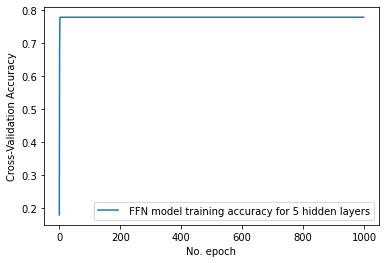

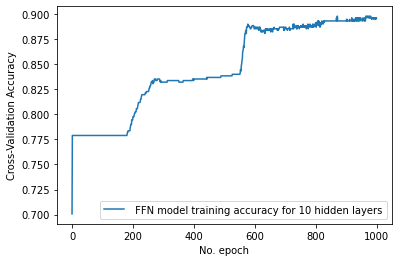

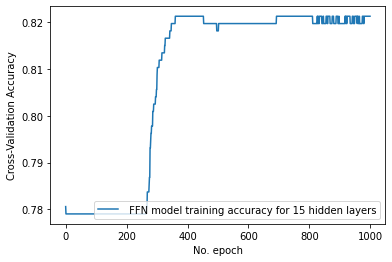

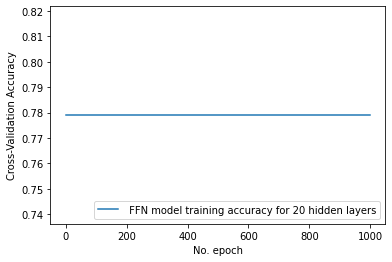

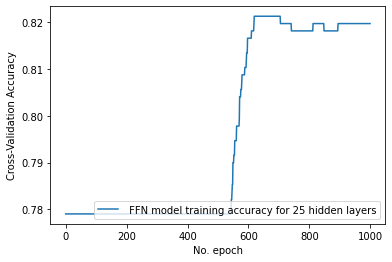

In [30]:
# Plot all Learning Curves
#Plot Hidden Layer 5
plt.plot(histories['ffn_hl_5'].history['val_accuracy'], label=' FFN model training accuracy for 5 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 10
plt.plot(histories['ffn_hl_10'].history['val_accuracy'], label=' FFN model training accuracy for 10 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 15
plt.plot(histories['ffn_hl_15'].history['val_accuracy'], label=' FFN model training accuracy for 15 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 20
plt.plot(histories['ffn_hl_20'].history['val_accuracy'], label=' FFN model training accuracy for 20 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Hidden Layer 25
plt.plot(histories['ffn_hl_25'].history['val_accuracy'], label=' FFN model training accuracy for 25 hidden layers')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [31]:
#Optimal Selection for number of neurons for hidden layer
num_neurons = 15

In [32]:
#Hidden layers of optimal number of neurons
# create the model
ffn_model_hl = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_hl.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 10 hidden layers neurons (Train Set)
histories['ffn_hl_opt_train'] = ffn_model_hl.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.7790
Epoch 805/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 806/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 807/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 808/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 809/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 810/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 811/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 812/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 813/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 814/1000
93/93 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7

In [33]:
#Fit the FFN model for 10 hidden layers neurons (Test Set)
histories['ffn_hl_opt_test'] = ffn_model_hl.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

- accuracy: 0.7790
Epoch 668/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 669/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 670/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 671/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 672/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 673/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 674/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 675/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 676/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 677/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 678/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 679/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 680/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 681/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 682/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 683/1000
40/40 - 0s - loss: 0.7725 - accuracy: 0.7790
Epoch 684/1000
40/40 

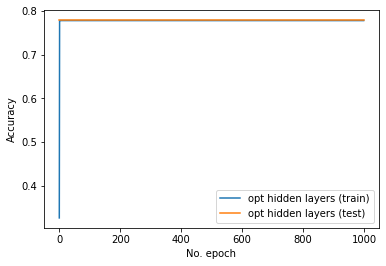

In [34]:
#Plot Hidden Layer 10 of train and test
plt.plot(histories['ffn_hl_opt_train'].history['accuracy'], label='opt hidden layers (train)')
plt.plot(histories['ffn_hl_opt_test'].history['accuracy'], label='opt hidden layers (test)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Part A Q4

In [35]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(0)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 0 decay
histories['ffn_d_0'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

0.8856
Epoch 805/1000
93/93 - 0s - loss: 0.6667 - accuracy: 0.8905 - val_loss: 0.6654 - val_accuracy: 0.8856
Epoch 806/1000
93/93 - 0s - loss: 0.6667 - accuracy: 0.8911 - val_loss: 0.6653 - val_accuracy: 0.8856
Epoch 807/1000
93/93 - 0s - loss: 0.6666 - accuracy: 0.8905 - val_loss: 0.6653 - val_accuracy: 0.8856
Epoch 808/1000
93/93 - 0s - loss: 0.6666 - accuracy: 0.8918 - val_loss: 0.6652 - val_accuracy: 0.8856
Epoch 809/1000
93/93 - 0s - loss: 0.6666 - accuracy: 0.8911 - val_loss: 0.6652 - val_accuracy: 0.8856
Epoch 810/1000
93/93 - 0s - loss: 0.6665 - accuracy: 0.8918 - val_loss: 0.6649 - val_accuracy: 0.8856
Epoch 811/1000
93/93 - 0s - loss: 0.6664 - accuracy: 0.8918 - val_loss: 0.6650 - val_accuracy: 0.8856
Epoch 812/1000
93/93 - 0s - loss: 0.6664 - accuracy: 0.8911 - val_loss: 0.6649 - val_accuracy: 0.8856
Epoch 813/1000
93/93 - 0s - loss: 0.6663 - accuracy: 0.8918 - val_loss: 0.6649 - val_accuracy: 0.8856
Epoch 814/1000
93/93 - 0s - loss: 0.6663 - accuracy: 0.8918 - val_loss: 0.6

In [36]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-3)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 10^-3 decay
histories['ffn_d_3'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

ss: nan - val_accuracy: 0.7790
Epoch 793/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 794/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 795/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 796/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 797/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 798/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 799/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 800/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 803

In [37]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-6)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 10^-6 decay
histories['ffn_d_6'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

ss: nan - val_accuracy: 0.7790
Epoch 793/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 794/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 795/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 796/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 797/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 798/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 799/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 800/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 803

In [38]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-9)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 10^-9 decay
histories['ffn_d_9'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

ss: nan - val_accuracy: 0.7790
Epoch 793/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 794/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 795/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 796/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 797/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 798/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 799/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 800/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 803

In [39]:
#Find optimal decay
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10^-12)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Fit the FFN model for 10^-12 decay
histories['ffn_d_12'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

ss: nan - val_accuracy: 0.7790
Epoch 793/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 794/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 795/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 796/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 797/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 798/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 799/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 800/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 803

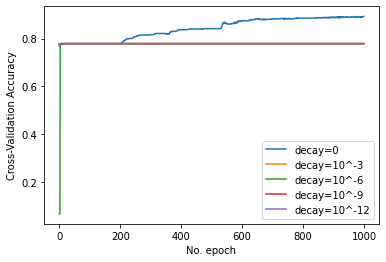

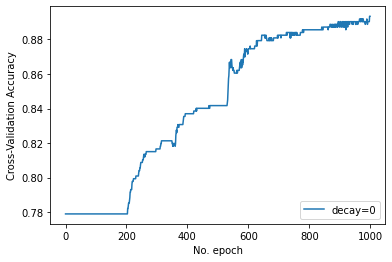

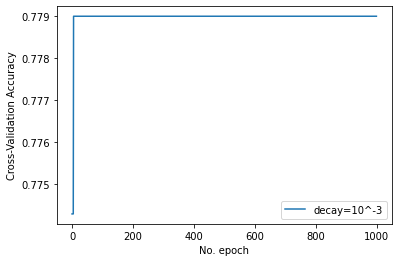

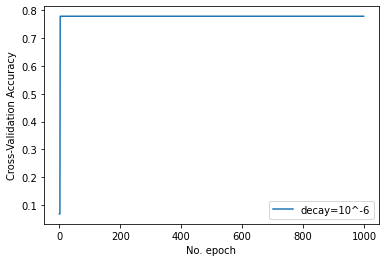

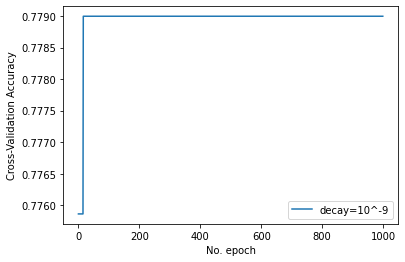

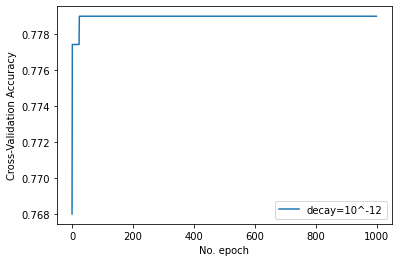

In [40]:
# Plot all Learning Curves
#Plot Decays
plt.plot(histories['ffn_d_0'].history['val_accuracy'], label='decay=0')
plt.plot(histories['ffn_d_3'].history['val_accuracy'], label='decay=10^-3')
plt.plot(histories['ffn_d_6'].history['val_accuracy'], label='decay=10^-6')
plt.plot(histories['ffn_d_9'].history['val_accuracy'], label='decay=10^-9')
plt.plot(histories['ffn_d_12'].history['val_accuracy'], label='decay=10^-12')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

#Plot Decays
plt.plot(histories['ffn_d_0'].history['val_accuracy'], label='decay=0')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_3'].history['val_accuracy'], label='decay=10^-3')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_6'].history['val_accuracy'], label='decay=10^-6')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_9'].history['val_accuracy'], label='decay=10^-9')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_d_12'].history['val_accuracy'], label='decay=10^-12')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()


In [48]:
#Optimal Decay Parameter
decay=10^-3

In [49]:
# create the model
ffn_model_decay = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_decay.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Fit the FFN model for optical decay (Test Set)
histories['ffn_d_opt_test'] = ffn_model_decay.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True)

0/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 651/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 652/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 653/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 654/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 655/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 656/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 657/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 658/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 659/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 660/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 661/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 662/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 663/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 664/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 665/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 666/1000
40/40 - 0s - loss: nan - accuracy: 0.7790
Epoch 667/1000
40/40 - 0s - loss: nan -

In [50]:
#Fit the FFN model for optical decay (Train Set)
histories['ffn_d_opt_train'] = ffn_model_decay.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

ss: nan - val_accuracy: 0.7790
Epoch 793/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 794/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 795/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 796/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 797/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 798/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 799/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 800/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 801/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 802/1000
93/93 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 803

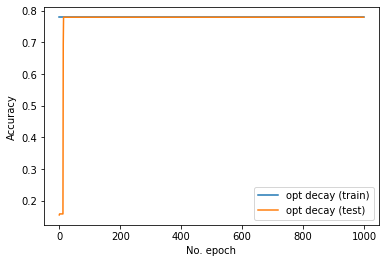

In [51]:
#Plot optimal decay of train and test
plt.plot(histories['ffn_d_opt_train'].history['accuracy'], label='opt decay (train)')
plt.plot(histories['ffn_d_opt_test'].history['accuracy'], label='opt decay (test)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Q5

In [45]:
# create the 4-layered model
ffn_model_4layer = keras.Sequential([
    keras.layers.Dense(10, activation='relu',kernel_regularizer=l2(10^-6)),
    keras.layers.Dense(10, activation='relu',kernel_regularizer=l2(10^-6)),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

ffn_model_4layer.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Fit the FFN model for optical decay (Test Set)
histories['ffn_4_layer_test'] = ffn_model_4layer.fit(testX, testY, 
                    epochs=epochs, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True)

0/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 651/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 652/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 653/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 654/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 655/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 656/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 657/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 658/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 659/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 660/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 661/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 662/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 663/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 664/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 665/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 666/1000
20/20 - 0s - loss: nan - accuracy: 0.7790
Epoch 667/1000
20/20 - 0s - loss: nan -

In [46]:
#Fit the FFN model for optical decay (Train Set)
histories['ffn_4_layer_train'] = ffn_model_4layer.fit(trainX, trainY, 
                    epochs=epochs, 
                    batch_size=32, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))

ss: nan - val_accuracy: 0.7790
Epoch 793/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 794/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 795/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 796/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 797/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 798/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 799/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 800/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 801/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 802/1000
47/47 - 0s - loss: nan - accuracy: 0.7782 - val_loss: nan - val_accuracy: 0.7790
Epoch 803

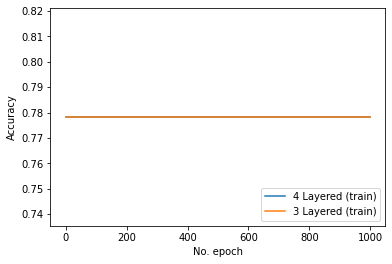

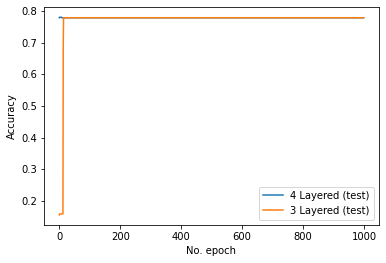

In [52]:
#Plot optimal decay of train and test
plt.plot(histories['ffn_4_layer_train'].history['accuracy'], label='4 Layered (train)')
plt.plot(histories['ffn_d_opt_train'].history['accuracy'], label='3 Layered (train)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(histories['ffn_4_layer_test'].history['accuracy'], label='4 Layered (test)')
plt.plot(histories['ffn_d_opt_test'].history['accuracy'], label='3 Layered (test)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()